In [11]:
%matplotlib inline
from pyvista import set_plot_theme

set_plot_theme("document")

# 1.1 -Basics of geological modeling with GemPy GemPy 地质建模基础


In [12]:
import os

import numpy as np


## Importing Necessary Libraries 导入必要的库


In [13]:
import gempy_viewer as gpv

import gempy as gp

# 修复 OMP: Error #15 冲突
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

## Importing and Defining Input Data

:obj:`gempy.core.data.GeoModel`
GemPy uses Python objects to store the data that builds the geological model. The main data classes include:

    -  :obj:`gempy.core.data.GeoModel`
    -  :obj:`gempy.core.data.StructuralFrame`
    -  :obj:`gempy.core.data.StructuralGroup`
    -  :obj:`gempy.core.data.StructuralElement`
    -  :obj:`gempy.core.data.SurfacePointsTable`
    -  :obj:`gempy.core.data.OrientationsTable`
    -  :obj:`gempy.core.data.Grid`

You can also create data from raw CSV files (comma-separated values). This could be useful if you are exporting model data
from a different program or creating it in a spreadsheet software like Microsoft Excel or LibreOffice Calc.

In this tutorial, we'll use CSV files to generate input data. You can find these example files in the `gempy data`
repository on GitHub. The data consists of x, y, and z positional values for all surface points and orientation
measurements. Additional data includes poles, azimuth and polarity (or the gradient components). Surface points are
assigned a formation, which can be a lithological unit (like "Sandstone") or a structural feature (like "Main Fault").

It's important to note that, in GemPy, interface position points mark the **bottom** of a layer. If you need points
to represent the top of a formation (for example, when modeling an intrusion), you can define an inverted orientation measurement.

While generating data from CSV files, we also need to define the model's real extent in x, y, and z. This extent
defines the area used for interpolation and many of the plotting functions. We also set a resolution to establish a
regular grid right away. This resolution will dictate the number of voxels used during modeling. We're using a medium
resolution of 50x50x50 here, which results in 125,000 voxels. The model extent should enclose all relevant data in a
representative space. As our model voxels are prisms rather than cubes, the resolution can differ from the extent.
However, it is recommended to avoid going beyond 100 cells in each direction (1,000,000 voxels) to prevent excessive
computational costs.

:obj:`gempy.core.data.GeoModel`
GemPy 使用 Python 对象来存储构建地质模型的数据。主要的数据类包括：

    -  :obj:`gempy.core.data.GeoModel`
    -  :obj:`gempy.core.data.StructuralFrame`
    -  :obj:`gempy.core.data.StructuralGroup`
    -  :obj:`gempy.core.data.StructuralElement`
    -  :obj:`gempy.core.data.SurfacePointsTable`
    -  :obj:`gempy.core.data.OrientationsTable`
    -  :obj:`gempy.core.data.Grid`

您也可以从原始 CSV 文件（逗号分隔值）创建数据。如果您是从其他程序导出模型数据，或者在 Microsoft Excel 或 LibreOffice Calc 等电子表格软件中创建数据，这将非常有用。

在本教程中，我们将使用 CSV 文件生成输入数据。您可以在 GitHub 上的 `gempy data` 仓库中找到这些示例文件。数据包含所有表面点和方向测量的 x、y 和 z 位置值。其他数据包括极点、方位角和极性（或梯度分量）。表面点被分配了一个地层，它可以是一个岩性单元（如“砂岩”）或一个构造特征（如“主断层”）。

值得注意的是，在 GemPy 中，界面位置点标记了层的**底部**。如果您需要点来表示地层的顶部（例如，在模拟侵入体时），您可以定义一个反向的方向测量。

在从 CSV 文件生成数据时，我们还需要定义模型在 x、y 和 z 方向上的实际范围。此范围定义了用于插值和许多绘图功能的区域。我们还设置了一个分辨率以立即建立一个规则网格。此分辨率将决定建模期间使用的体素数量。我们在这里使用 50x50x50 的中等分辨率，这将产生 125,000 个体素。模型范围应在一个代表性空间内包含所有相关数据。由于我们的模型体素是棱柱而不是立方体，因此分辨率可以与范围不同。
但是，建议避免在每个方向上超过 100 个单元格（1,000,000 个体素），以防止过高的计算成本。


In [14]:
data_path = "https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/"

geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name="Tutorial_ch1_1_Basics",
    extent=[0, 2000, 0, 2000, 0, 750],
    refinement=6,  # * Here we define the number of octree levels. If octree levels are defined, the resolution is ignored.
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=data_path + "/data/input_data/getting_started/simple_fault_model_orientations.csv",
        path_to_surface_points=data_path + "/data/input_data/getting_started/simple_fault_model_points.csv",
        hash_surface_points="4cdd54cd510cf345a583610585f2206a2936a05faaae05595b61febfc0191563",
        hash_orientations="7ba1de060fc8df668d411d0207a326bc94a6cdca9f5fe2ed511fd4db6b3f3526",
    ),
)

Surface points hash:  4cdd54cd510cf345a583610585f2206a2936a05faaae05595b61febfc0191563
Orientations hash:  7ba1de060fc8df668d411d0207a326bc94a6cdca9f5fe2ed511fd4db6b3f3526


.. admonition:: New in GemPy 3!

GemPy 3 has introduced the `ImporterHelper` class to streamline importing data from various sources. This class
simplifies the process of passing multiple arguments needed for importing data and will likely see further
extensions in the future. Currently, one of its uses is to handle `pooch` arguments for downloading data from the internet.

.. admonition:: GemPy 3 新功能！

GemPy 3 引入了 `ImporterHelper` 类，以简化从各种来源导入数据的过程。此类简化了传递导入数据所需的多个参数的过程，并且将来可能会有进一步的扩展。目前，它的用途之一是处理 `pooch` 参数以从互联网下载数据。

## Reviewing the Imported Data 审查导入的数据

Now that the `geo_model` object is set up and the data imported from the CSV files, we review the data imported using the properties `surface_points_copy` and `orientations_copy`.

Using `structural_frame.element_id_name_map`, we can see which ID corresponds to which structural element name in the data.

现在 `geo_model` 对象已设置完毕，数据也已从 CSV 文件导入，我们使用属性 `surface_points_copy` 和 `orientations_copy` 来审查导入的数据。

使用 `structural_frame.element_id_name_map`，我们可以查看哪个 ID 对应于数据中的哪个构造元素名称。


In [15]:
geo_model.surface_points_copy

X,Y,Z,id,nugget
700.00,1000.00,300.00,49745034,0.00
600.00,1000.00,200.00,49745034,0.00
500.00,1000.00,100.00,49745034,0.00
1000.00,1000.00,600.00,49745034,0.00
1100.00,1000.00,700.00,49745034,0.00
1000.00,50.00,350.00,182903737,0.00
1000.00,150.00,333.33,182903737,0.00
1000.00,300.00,333.33,182903737,0.00
1000.00,500.00,366.67,182903737,0.00
1000.00,1000.00,433.33,182903737,0.00


In [16]:
geo_model.orientations_copy

X,Y,Z,G_x,G_y,G_z,id,nugget
500.00,1000.00,300.00,-0.95,-0.00,0.32,49745034,0.01
400.00,1000.00,420.00,0.32,0.00,0.95,247016868,0.01
1000.00,1000.00,300.00,0.32,0.00,0.95,332313703,0.01


## Declaring the Sequential Order of Structural Elements (Geological Formations) 声明构造元素（地质地层）的顺序

In our model, we want the geological units to appear in the correct chronological order. This order could be determined by a sequence
of stratigraphic deposition, unconformities due to erosion, or other lithological genesis events like igneous intrusions. A similar
age-related order is declared for faults in our model. In GemPy, we use the function `gempy.map_stack_to_surfaces` to assign formations
or faults to different sequential series by declaring them in a Python dictionary.

The correct ordering of series is crucial for model construction! It's possible to assign several surfaces to one series. The order of
units within a series only affects the color code, so we recommend maintaining consistency. The order can be defined by simply changing
the order of the lists within the `gempy.core.data.StructuralFrame.structural_groups` and `gempy.core.data.StructuralGroups.elements` attributes.

Faults are treated as independent groups and must be younger than the groups they affect. The relative order between different faults
defines their tectonic relationship (the first entry is the youngest).

For a model with simple sequential stratigraphy, all layer formations can be assigned to one series without an issue. All unit
boundaries and their order would then be determined by interface points. However, to model more complex lithostratigraphical
relations and interactions, separate series definitions become important. For example, modeling an unconformity or an intrusion
that disrupts older stratigraphy would require declaring a younger series.

By default, a simple sequence/group is created inferred from the data as shown above.

Our example model comprises four main layers (plus an underlying basement that is automatically generated by GemPy) and one main
normal fault displacing those layers. Assuming a simple stratigraphy where each younger unit was deposited onto the underlying
older one, we can assign these layer formations to one structural group called "Strat_Series". For the fault, we declare a
respective "Fault_Series" as the first key entry in the mapping dictionary. We could give any other names to these series;
the formations, however, have to be referred to as named in the input data.

In the following, we map the "Main Fault" to the "Fault Series" and the individual formations to the "Strat Series".

在我们的模型中，我们希望地质单元按正确的时间顺序出现。这个顺序可以由地层沉积序列、侵蚀造成的不整合面或其他岩性成因事件（如火成岩侵入）决定。在我们的模型中，断层也声明了类似的与年龄相关的顺序。在 GemPy 中，我们使用函数 `gempy.map_stack_to_surfaces` 通过在 Python 字典中声明地层或断层，将它们分配给不同的序列系列。

系列的正确排序对于模型构建至关重要！可以将多个表面分配给一个系列。系列内单元的顺序仅影响颜色代码，因此我们建议保持一致性。可以通过简单地更改 `gempy.core.data.StructuralFrame.structural_groups` 和 `gempy.core.data.StructuralGroups.elements` 属性中列表的顺序来定义顺序。

断层被视为独立的组，并且必须比它们影响的组更年轻。不同断层之间的相对顺序定义了它们的构造关系（第一个条目是最年轻的）。

对于具有简单层序地层学的模型，所有层地层都可以分配给一个系列而不会出现问题。所有单元边界及其顺序随后将由界面点确定。然而，为了模拟更复杂的岩石地层关系和相互作用，单独的系列定义变得很重要。例如，模拟破坏旧地层的不整合面或侵入体将需要声明一个更年轻的系列。

默认情况下，如上所示，会根据数据推断创建一个简单的序列/组。

我们的示例模型包含四个主要层（加上一个由 GemPy 自动生成的底层基底）和一个使这些层发生位移的主要正断层。假设一个简单的地层学，其中每个较年轻的单元都沉积在下面的较旧单元之上，我们可以将这些层地层分配给一个名为“Strat_Series”的构造组。对于断层，我们在映射字典中声明一个相应的“Fault_Series”作为第一个键条目。我们可以给这些系列起任何其他名字；但是，地层必须按照输入数据中的名称引用。

在下文中，我们将“Main Fault”映射到“Fault Series”，将各个地层映射到“Strat Series”。


In [17]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    mapping_object={"Fault_Series": "Main_Fault", "Strat_Series": ("Sandstone_2", "Siltstone", "Shale", "Sandstone_1")},  # type: ignore
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Main_Fault,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sandstone_2,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Siltstone,
	color=#443988,
	is_active=True
),
Element(
	name=Shale,
	color=#728f02,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False],
 [False, False]],

Note how the structural frame still indicates the "Fault Series" group to have a relation type "erode".
We still need to tell GemPy that we want this group to be a fault. We do this using the function `set_is_fault`.

请注意，构造框架仍然显示“Fault Series”组具有“erode”（侵蚀）关系类型。
我们仍然需要告诉 GemPy 我们希望这个组是一个断层。我们使用函数 `set_is_fault` 来完成此操作。


In [18]:
gp.set_is_fault(frame=geo_model.structural_frame, fault_groups=["Fault_Series"])

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=Main_Fault,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sandstone_2,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Siltstone,
	color=#443988,
	is_active=True
),
Element(
	name=Shale,
	color=#728f02,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False,  True],
 [False, False]],

Now, all surfaces have been assigned to a series and are displayed in the correct order
(from young to old).

现在，所有表面都已分配给一个系列，并按正确的顺序显示（从年轻到年老）。

### Returning Information from Our Input Data 从我们的输入数据返回信息

Our model input data, named "geo_model", contains all essential information for constructing
our model. You can access different types of information by accessing the attributes.
For instance, you can retrieve the coordinates of our modeling grid as follows:

我们的模型输入数据名为“geo_model”，包含构建模型的所有基本信息。您可以通过访问属性来获取不同类型的信息。
例如，您可以按如下方式检索建模网格的坐标：


In [19]:
geo_model.grid

Grid(values=array([[  15.625   ,   15.625   ,    5.859375],
       [  15.625   ,   15.625   ,   17.578125],
       [  15.625   ,   15.625   ,   29.296875],
       ...,
       [1984.375   , 1984.375   ,  720.703125],
       [1984.375   , 1984.375   ,  732.421875],
       [1984.375   , 1984.375   ,  744.140625]], shape=(262144, 3)), length=array([], dtype=float64), _octree_grid=RegularGrid(resolution=array([64, 64, 64]), extent=array([   0., 2000.,    0., 2000.,    0.,  750.]), values=array([[  15.625   ,   15.625   ,    5.859375],
       [  15.625   ,   15.625   ,   17.578125],
       [  15.625   ,   15.625   ,   29.296875],
       ...,
       [1984.375   , 1984.375   ,  720.703125],
       [1984.375   , 1984.375   ,  732.421875],
       [1984.375   , 1984.375   ,  744.140625]], shape=(262144, 3)), mask_topo=array([], shape=(0, 3), dtype=bool), _transform=None), _dense_grid=None, _custom_grid=None, _topography=None, _sections=None, _centered_grid=None, _transform=None, _octree_levels=-1

### Visualizing input data 可视化输入数据

Since we have already imported our input data, we can go ahead and visualize it in 2D and 3D. This can be useful to check if all points
and orientations are defined the way we want them to be. Using the function `gempy_viewer.plot2d`, we obtain a 2D projection of our
data points onto a plane of the chosen _direction_ (we can choose this attribute to be either x, y or z, with the default being y).
Below, we can freely switch the direction and check out the projection from different sides to get a good idea.

由于我们已经导入了输入数据，我们可以继续在 2D 和 3D 中对其进行可视化。这对于检查所有点和方向是否按我们想要的方式定义非常有用。使用函数 `gempy_viewer.plot2d`，我们可以获得数据点在所选*方向*平面上的 2D 投影（我们可以选择此属性为 x、y 或 z，默认为 y）。
下面，我们可以自由切换方向并从不同侧面查看投影以获得一个好的概念。


c:\Users\WangQinZhuo\miniconda3\envs\transform2021_devito\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


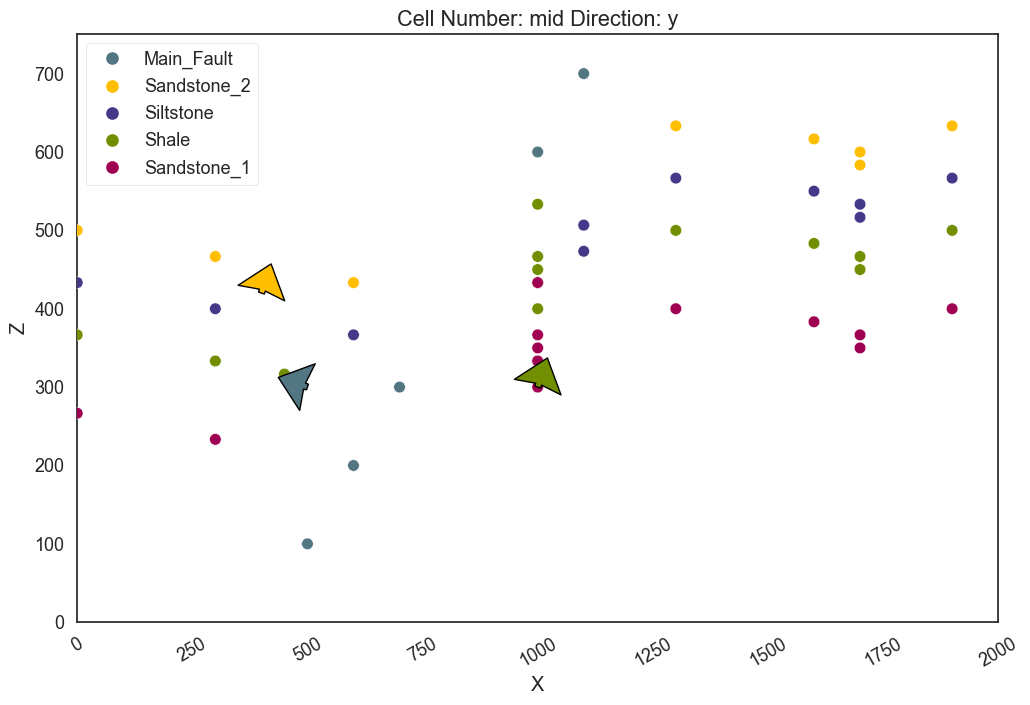

In [20]:
plot = gpv.plot_2d(geo_model, show_lith=False, show_boundaries=False)

Beyond 2D, however, we can also visualize our input data in full 3D using `gempy_viewer.plot_3d`. Note that direct 3D visualization
in GemPy requires [the Visualization Toolkit](https://www.vtk.org/) (VTK) to be installed.

除了 2D 之外，我们还可以使用 `gempy_viewer.plot_3d` 在全 3D 中可视化我们的输入数据。请注意，GemPy 中的直接 3D 可视化需要安装 [Visualization Toolkit](https://www.vtk.org/) (VTK)。


In [21]:
# gpv.plot_3d(geo_model, image=False, plotter_type="basic")

### Model Generation 模型生成

Once we've correctly defined all our primary information in our `gempy.core.data.GeoModel` object (referred to as `geo_model`
in these tutorials), we can proceed with the model computation step. We can go ahead and save the solution of a specific computation
as we do below, but solutions are also stored within the `gempy.core.data.GeoModel` object for future reference.

一旦我们在 `gempy.core.data.GeoModel` 对象（在这些教程中称为 `geo_model`）中正确定义了所有主要信息，我们就可以继续进行模型计算步骤。我们可以像下面那样保存特定计算的解，但解也存储在 `gempy.core.data.GeoModel` 对象中以供将来参考。

.. admonition:: New in GemPy 3! Numpy and TensorFlow backend

Unlike previous versions, GemPy 3 doesn't rely on `theano` or `asera`.
Instead, it utilizes `numpy` or `tensorflow`. Consequently, we no longer need
to recompile all theano functions (TensorFlow uses eager execution; we found no
notable speed difference after profiling the XLA compiler).

.. admonition:: GemPy 3 新功能！ Numpy 和 TensorFlow 后端

与以前的版本不同，GemPy 3 不依赖于 `theano` 或 `asera`。
相反，它利用 `numpy` 或 `tensorflow`。因此，我们不再需要重新编译所有 theano 函数（TensorFlow 使用急切执行；我们在分析 XLA 编译器后发现没有明显的速度差异）。


The parameters used for the interpolation are stored in
`gempy.core.data.GeoModel.interpolation_options`. These parameters have sensible default values
that you can modify if necessary. However, we advise caution when changing these parameters
unless you fully understand their implications.

用于插值的参数存储在 `gempy.core.data.GeoModel.interpolation_options` 中。这些参数具有合理的默认值，如有必要，您可以对其进行修改。但是，除非您完全了解其含义，否则我们建议在更改这些参数时要小心。


Display the current interpolation options:

显示当前的插值选项：


In [22]:
geo_model.interpolation_options

InterpolationOptions(kernel_options=KernelOptions(range=1.7, c_o=10.0, uni_degree=1, i_res=4.0, gi_res=2.0, number_dimensions=3, kernel_function=AvailableKernelFunctions.cubic, kernel_solver=Solvers.DEFAULT, compute_condition_number=False, optimizing_condition_number=False, condition_number=None), evaluation_options=EvaluationOptions(_number_octree_levels=6, _number_octree_levels_surface=4, octree_curvature_threshold=-1.0, octree_error_threshold=1.0, octree_min_level=2, mesh_extraction=True, mesh_extraction_masking_options=<MeshExtractionMaskingOptions.INTERSECT: 3>, mesh_extraction_fancy=True, evaluation_chunk_size=500000, compute_scalar_gradient=False, verbose=False), debug=True, cache_mode=<CacheMode.IN_MEMORY_CACHE: 3>, cache_model_name='Tutorial_ch1_1_Basics', block_solutions_type=<BlockSolutionType.OCTREE: 1>, sigmoid_slope=5000000, debug_water_tight=False)

With all our prerequisites in place, we can now compute our complete geological model
using :func:`gempy.compute_model`. This function returns a :obj:`gempy.core.data.Solutions` object.

The following sections illustrate these different model solutions and how to utilize them.

准备好所有先决条件后，我们现在可以使用 :func:`gempy.compute_model` 计算完整的地质模型。此函数返回一个 :obj:`gempy.core.data.Solutions` 对象。

以下部分说明了这些不同的模型解以及如何利用它们。


Compute the geological model and get the solutions:

计算地质模型并获取解：


In [23]:
sol = gp.compute_model(geo_model)
sol

Setting Backend To: AvailableBackends.numpy


c:\Users\WangQinZhuo\miniconda3\envs\transform2021_devito\lib\site-packages\gempy_engine\modules\activator\_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Chunking done: 13 chunks
Chunking done: 7 chunks
Using sequential processing for 1 surfaces
Using sequential processing for 4 surfaces


Solutions(6 Octree Levels, 5 DualContouringMeshes)

Solutions are also stored within the :obj:`gempy.core.data.GeoModel` object, for future reference.

解也存储在 :obj:`gempy.core.data.GeoModel` 对象中，以供将来参考。


In [24]:
geo_model.solutions

Solutions(6 Octree Levels, 5 DualContouringMeshes)

### Direct model visualization in GemPy GemPy 中的直接模型可视化

Model solutions can be easily visualized in 2D sections in GemPy
directly. Let's take a look at our lithology block:

模型解可以直接在 GemPy 中以 2D 剖面轻松可视化。让我们看看我们的岩性块：


c:\Users\WangQinZhuo\miniconda3\envs\transform2021_devito\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


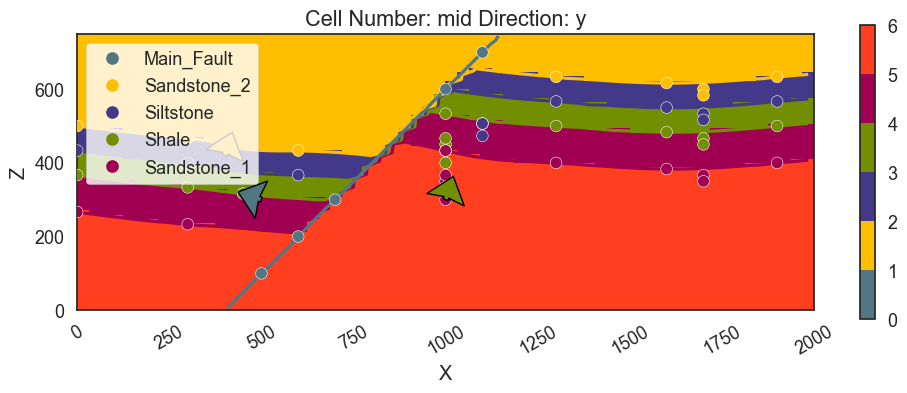

In [25]:
gpv.plot_2d(geo_model, show_data=True, cell_number="mid", direction="y")

With `cell_number=mid`, we have chosen a section going through
the middle of our block. We have moved in `direction='y'`,
the plot thus depicts a plane parallel to the $x$- and
$y$-axes. Setting `show_data=True`, we could plot original data
together with the results. Changing the values for `cell_number` and
`direction`, we can move through our 3D block model and explore it by
looking at different 2D planes.

We can do the same with the underlying scalar-field solution:

使用 `cell_number=mid`，我们选择了一个穿过块体中间的剖面。我们沿 `direction='y'` 移动，因此该图描绘了一个平行于 $x$ 和 $y$ 轴的平面。设置 `show_data=True`，我们可以将原始数据与结果一起绘制。更改 `cell_number` 和 `direction` 的值，我们可以通过查看不同的 2D 平面来移动穿过我们的 3D 块体模型并对其进行探索。

我们可以对底层的标量场解做同样的事情：


In [ ]:
gpv.plot_2d(
    model=geo_model,
    series_n=0,  # This will plot the scalar field used for the fault
    show_data=False,
    show_scalar=True,
    show_lith=False,
)

In [ ]:
gpv.plot_2d(
    model=geo_model,
    series_n=1,  # This will plot the scalar field used for the stratigraphy
    show_data=False,
    show_scalar=True,
    show_lith=False,
)

### Dual Contouring and vtk visualization 对偶等值线和 VTK 可视化

In addition to 2D sections we can extract surfaces to visualize in 3D
renderers. Surfaces can be visualized as 3D triangle complexes in VTK
(see function plot_surfaces_3D below). To create these triangles, we
need to extract respective vertices and simplices from the potential
fields of lithologies and faults. This process is automatized in GemPy
using dual contouring in the :obj:`gempy_engine`.

除了 2D 剖面，我们还可以提取表面以在 3D 渲染器中进行可视化。表面可以在 VTK 中可视化为 3D 三角形复合体（见下面的 plot_surfaces_3D 函数）。为了创建这些三角形，我们需要从岩性和断层的势场中提取相应的顶点和单纯形。此过程在 GemPy 中使用 :obj:`gempy_engine` 中的对偶等值线自动完成。

.. admonition:: New in GemPy 3! Dual Contouring

GemPy 3 uses dual contouring to extract surfaces from the scalar fields. The method is completely coded in :obj:`gempy_engine` what also
enables further improvements in the midterm. This method is more efficient to use
together with octrees and suited better the new capabilities of gempy3.

.. admonition:: GemPy 3 新功能！ 对偶等值线 (Dual Contouring)

GemPy 3 使用对偶等值线从标量场中提取表面。该方法完全在 :obj:`gempy_engine` 中编码，这也使得中期内的进一步改进成为可能。此方法更有效地与八叉树一起使用，并且更适合 gempy3 的新功能。


In [ ]:
gpv.plot_3d(geo_model, show_data=False, image=False, plotter_type="basic")

### Adding topography 添加地形（未读）

In gempy we can add more grid types for different purposes. We will explore this concept in more detail in the
next tutorials (:doc:`ch1_3a_grids`). For now, we will just add a topography grid to our model. This grid allows us to intersect the
surfaces as well as compute a high resolution geological mal.

在 gempy 中，我们可以为不同的目的添加更多网格类型。我们将在下一个教程（:doc:`ch1_3a_grids`）中更详细地探讨这个概念。现在，我们将仅向我们的模型添加一个地形网格。此网格允许我们相交表面以及计算高分辨率地质图。


In [ ]:
gp.set_topography_from_random(
    grid=geo_model.grid,
    fractal_dimension=1.2,
    d_z=np.array([350, 750]),
    topography_resolution=np.array([50, 50]),
)

gp.compute_model(geo_model)
gpv.plot_2d(geo_model, show_topography=True)

gpv.plot_3d(
    model=geo_model, plotter_type="basic", show_topography=True, show_surfaces=True, show_lith=True, image=False
)

### Compute at a given location 在给定位置计算

This is done by modifying the grid to a custom grid and recomputing.

这是通过将网格修改为自定义网格并重新计算来完成的。


In [ ]:
x_i = np.array([[1000, 1000, 1000]])
lith_values_at_coords: np.ndarray = gp.compute_model_at(gempy_model=geo_model, at=x_i)
lith_values_at_coords

Therefore if we just want the value at **x_i**:

因此，如果我们只想要 **x_i** 处的值：


In [ ]:
geo_model.solutions.raw_arrays.custom

.. admonition:: Work in progress

GemPy3 model serialization is currently being redisigned. Therefore, at the current version, there is not a build in
method to save the model. However, since now the data model should be completely robust, you should be able to save the
:obj:`gempy.core.data.GeoModel` and all its attributes using the standard python library [pickle](https://docs.python.org/3/library/pickle.html)

sphinx_gallery_thumbnail_number = -2

.. admonition:: 正在进行的工作

GemPy3 模型序列化目前正在重新设计。因此，在当前版本中，没有内置的方法来保存模型。但是，由于现在数据模型应该是完全健壮的，您应该能够使用标准 python 库 [pickle](https://docs.python.org/3/library/pickle.html) 保存 :obj:`gempy.core.data.GeoModel` 及其所有属性。

sphinx_gallery_thumbnail_number = -2
